# Project 2 MVP: Understanding World Happiness

##### Imports:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
with open("countries_data_munged.pkl", 'rb') as picklefile: 
    countries = pickle.load(picklefile)
countries['constant'] = 1

AttributeError: module 'seaborn' has no attribute 'safefig'

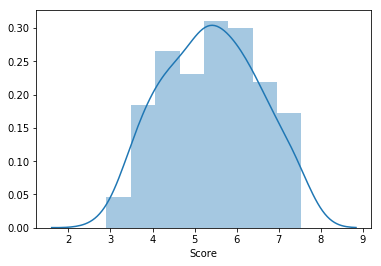

In [36]:
sns.distplot(countries.Score, hist = True, label = 'World Happiness Scores')

##### MVP: Modeling World Happiness

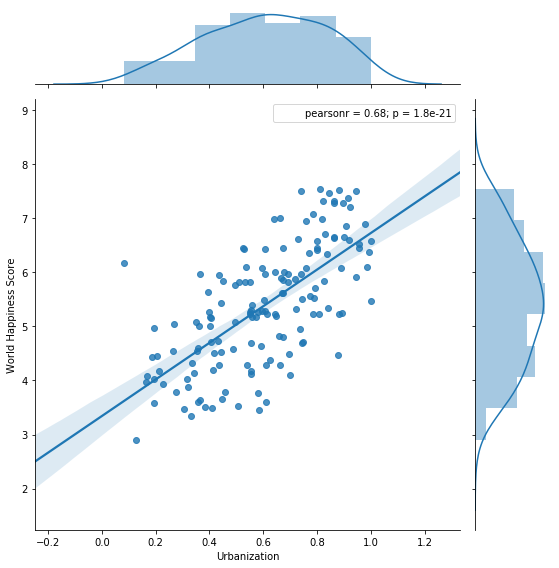

In [35]:
sns.jointplot(x='Urbanization', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('Urbanization')
plt.ylabel("World Happiness Score");
plt.savefig('Urbanization')

Urbanization Coefficient: 3.4

Urbanization is between 0 and 1

For every 10 percent increase in Urbanization, we see the score increases by 0.34.

##### More on Urbanization:

In [18]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries['Urbanization'][:,np.newaxis], countries.Score, test_size=0.3)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.38048162119908857

In [23]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.iloc[:,2:], countries.Score, test_size=0.3)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.75065778977200504

In [29]:
# Create your model
model = sm.OLS(countries.Score,countries[['Urbanization','constant']])
# Fit your model to your training set
fit=model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.82e-21
Time:                        13:55:02   Log-Likelihood:                -183.05
No. Observations:                 150   AIC:                             370.1
Df Residuals:                     148   BIC:                             376.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Urbanization     3.3858      0.302     11.197      0.000       2.788       3.983
constant         3.3412      0.195     17.148      0.000       2.956       3.726
==============================================================================
Omnibus:                        0.319   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.481
Skew:                          -0.012   Prob(JB):                        0.786
Kurtosis:                       2.724   Cond. No.                         6.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
residual = lr.predict(X_test) - y_test

Text(0,0.5,'residuals')

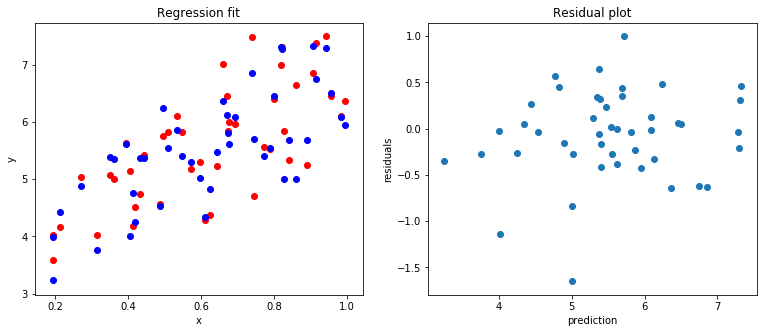

In [12]:
pred = lr.predict(X_test)
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(X_test['Urbanization'],y_test, color = 'red')
plt.scatter(X_test['Urbanization'], pred, color='blue',linewidth=1)
plt.title("Regression fit")
plt.xlabel("x")
plt.ylabel("y")
    
plt.subplot(1, 3, 2)
residual = pred - y_test
plt.scatter(pred, residual)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

### School Life Expectancy

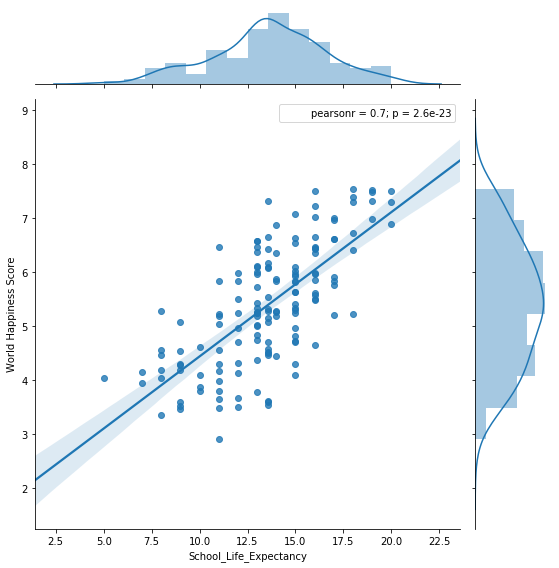

In [34]:
sns.jointplot(x='School_Life_Expectancy', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('School_Life_Expectancy')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

In [ ]:
# Create your model
model = sm.OLS(countries.Score,countries.School_Life_Expectancy)
# Fit your model to your training set
fit=model.fit()
# Print summary statistics of the model's performance
fit.summary()

In [ ]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.School_Life_Expectancy[:,np.newaxis], countries.Score, test_size=0.3)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)